### Decision Trees Example 2.1
We compare the two purity measures $G_m(T)$ (Gini index) and $D_m(T)$ (Cross-entropy or deviance) by means of the **heart** data set. The following code grows the two trees. 


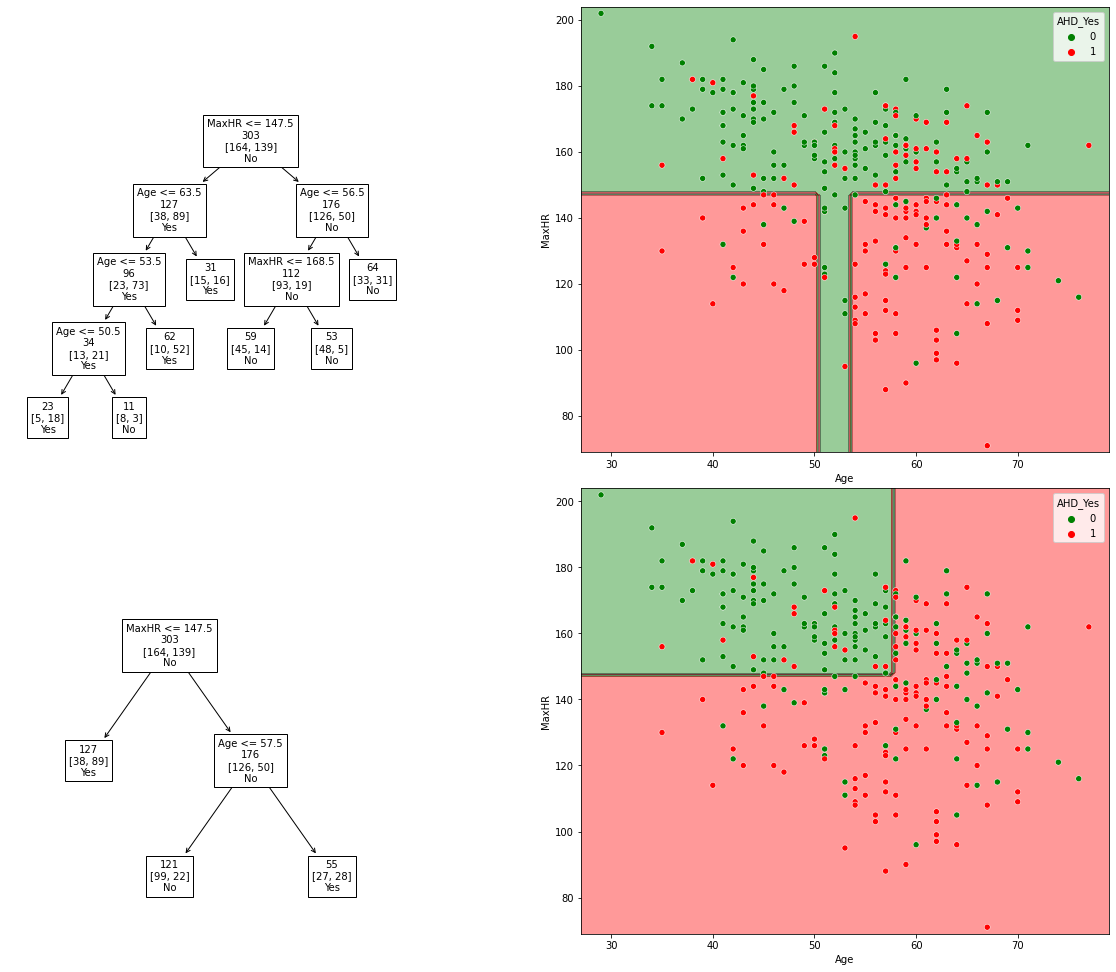

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)

# Define x and y
y = df[['AHD_Yes']]
X = df[['Age', 'MaxHR']]

# Create grid
margin, n = 2, 100
xx = np.linspace(min(X['Age']) - margin, max(X['Age']) + margin, n)
yy = np.linspace(min(X['MaxHR']) - margin, max(X['MaxHR']) + margin, n)
yy, xx = np.meshgrid(yy, xx)

# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))

# Classifier settings:
crit = ['entropy', 'gini']
mss = [10, 60]
# For each classifier criterion:
for i in range(len(crit)):
    # Create and fit Decision tree classifier
    clf = tree.DecisionTreeClassifier(criterion=crit[i], 
                                      min_samples_split=mss[i], 
                                      min_samples_leaf=5, 
                                      min_impurity_decrease=0.01)
    clf = clf.fit(X, y)
    # Predict
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot surface
    ax[i][1].contourf(xx, yy, Z, alpha=0.4,
                      colors=['green', 'black', 'red', 'black'])

    # Plot datapoints
    sns.scatterplot(x=df['Age'], y=df['MaxHR'],  ax=ax[i][1],
                    hue=df['AHD_Yes'], palette=['green', 'red'])

    # Plot Decision Tree
    tree.plot_tree(clf, ax=ax[i][0], fontsize=10, impurity=False, 
                   label='Root', feature_names=X.columns.values,
                   class_names=['No', 'Yes'])

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)    
plt.show()

For the Gini index the default control parameters had to be modified in order to get a comparable number of splits as with the cross-entropy. It can be seen that the major splits are very similar for the two methods. 